In [1]:
from __future__ import division
from neuron import h
import numpy as np
import pylab as pl
import os
#from insert_synapses import insert_syn, insert_osc, insert_syn_varweights, make_stim, make_con
from connection import *
%matplotlib inline
h.load_file("stdrun.hoc")  # Load NEURON libraries

h.nrn_load_dll("../connectivity/synapse_models/i686/.libs/libnrnmech.so")

1.0

In [2]:
modelname = "Bahl/Pyramidal.hoc"  #"model_Bahl8_CaApicLin_kca.hoc"
h.nrn_load_dll("../model/channels/i686/.libs/libnrnmech.so")
h.load_file(1, "../model/models/"+modelname)
cell = h.Pyramidal() # make pyramidal neurons

In [3]:
tstop = 700
dt = 0.025
onset = 200
h.tstop = tstop + onset # set before synapses are inserted

In [4]:
# Insert synapses
syn = [[]]*1

params_stim = {'kind': 'poisson', 'onset': onset, 'tstop': tstop, 'freq': 2, 'start': onset+200, 'noise': 0, 'pos' :0.5}
params_syn = {'kind':'NMDA' ,'pos':0.5}
params_weight = {'kind':'same', 'weight':0.0023} 
params_i1p1 = {'n_stim':1, 'cell': cell, 'section':'soma', 'params_stim':params_stim, 'params_syn':params_syn, 'params_weight':params_weight}
syn, stim, con, weights, _ = synaptic_input(**params_i1p1)

params_stim = {'kind': 'poisson', 'onset': onset, 'tstop': tstop, 'freq': 2, 'start': onset+200, 'noise': 0, 'pos' :0.5}
params_syn = {'kind':'AMPA' ,'pos':0.5}
params_weight = {'kind':'same', 'weight':0.0002} 
params_i2p1 = {'n_stim':1, 'cell': cell, 'section':'soma', 'params_stim':params_stim, 'params_syn':params_syn, 'params_weight':params_weight}
syn2, stim2, con2, weights2, _ = synaptic_input(**params_i2p1)

#weights: normal: AMPA: 0.00035, NMDA: 0.005, GABA: 0.01 facil: AMPA: 0.00035, NMDA: 0.000035, GABA: 0.06

In [5]:
# Create the Recording Vectors 
vec_t = h.Vector()
vec_v = h.Vector()
vec_v_tuft = h.Vector()
vec_v_tuft.record(cell.tuft(0)._ref_v)
vec_t.record(h._ref_t) # Time
vec_v.record(cell.soma(0.5)._ref_v) # Voltage

vec_i = [] # for the individual synaptic currents
for s in syn: 
    tmp = h.Vector()
    tmp.record(s._ref_i)
    vec_i.append(tmp)

In [6]:
# Run simulation
h.tstop = tstop
h.v_init = -70 
h.init()
h.run()

0.0

In [7]:
# Cut off onset 
v = np.array(vec_v)[int(onset/dt):int(tstop/dt)]
v_tuft = np.array(vec_v_tuft)[int(onset/h.dt):int(tstop/dt)]
t = np.array(vec_t)[int(onset/dt):int(tstop/dt)]

currents = [[]] * len(vec_i)
for idx, current in enumerate(vec_i):
    currents[idx] = np.array(current)[int(onset/dt):int(tstop/dt)]

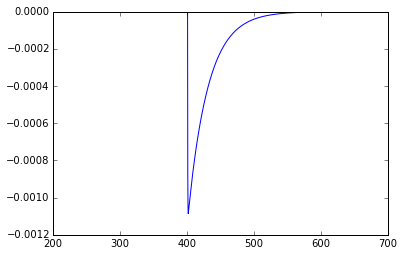

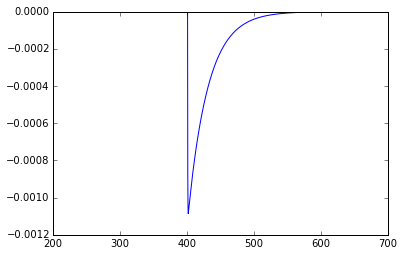

In [8]:
## Plot: Currents

# total synapic current
itotal = np.zeros(np.size(t))
for i in currents:
    itotal += i

pl.plot(t, itotal)
pl.xlim(onset,tstop)
pl.show()

for i in currents:
    pl.plot(t, i)
pl.xlim(onset,tstop)
pl.show()

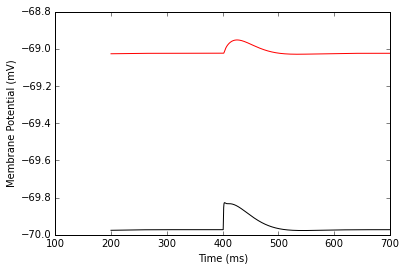

In [9]:
# Plot: membrane potential
pl.plot(t,v,'k')
pl.plot(t,v_tuft,'r')
pl.ylabel('Membrane Potential (mV)')
pl.xlabel('Time (ms)')
pl.show()

In [10]:
print np.max(v)-np.min(v)

0.149823180052
